**IMPORT PACKAGES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(22,12))
plt.rc('lines', markersize=12)
plt.rc('font', size=14)

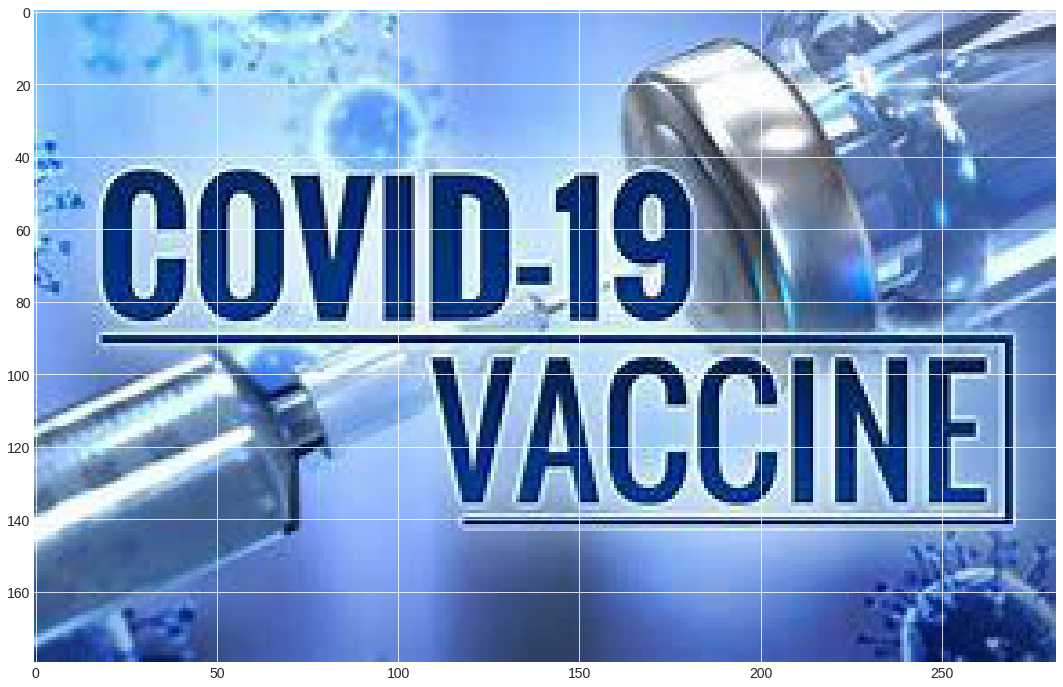

In [2]:
img = mpimg.imread('../input/image-c19/OIP (1).jpg')
plt.imshow(img)

**IMPORT COVID-19 VACCINATION DATASET**

In [3]:
cv = pd.read_csv('../input/covid-19vaccinationprocess/country_vaccinations.csv')
cv

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,12/29/2020,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,12/30/2020,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,12/31/2020,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,01/01/2021,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,01/02/2021,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Wales,WAL,01/17/2021,151938.0,151737.0,201.0,NaN,9403.0,4.82,4.81,0.01,2982.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1319,Wales,WAL,01/18/2021,162197.0,161932.0,265.0,10259.0,10123.0,5.14,5.14,0.01,3211.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1320,Wales,WAL,01/19/2021,176186.0,175816.0,370.0,13989.0,10672.0,5.59,5.58,0.01,3385.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1321,Wales,WAL,01/20/2021,190831.0,190435.0,396.0,14645.0,11105.0,6.05,6.04,0.01,3522.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


**Na AND NAN VALUES IN DATASETS**

In [4]:
cv.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      450
people_vaccinated                       481
people_fully_vaccinated                1125
daily_vaccinations_raw                  623
daily_vaccinations                       57
total_vaccinations_per_hundred          450
people_vaccinated_per_hundred           481
people_fully_vaccinated_per_hundred    1125
daily_vaccinations_per_million           57
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

**PLOT THE NULL VALUES IN HEATMAP**

<AxesSubplot:>

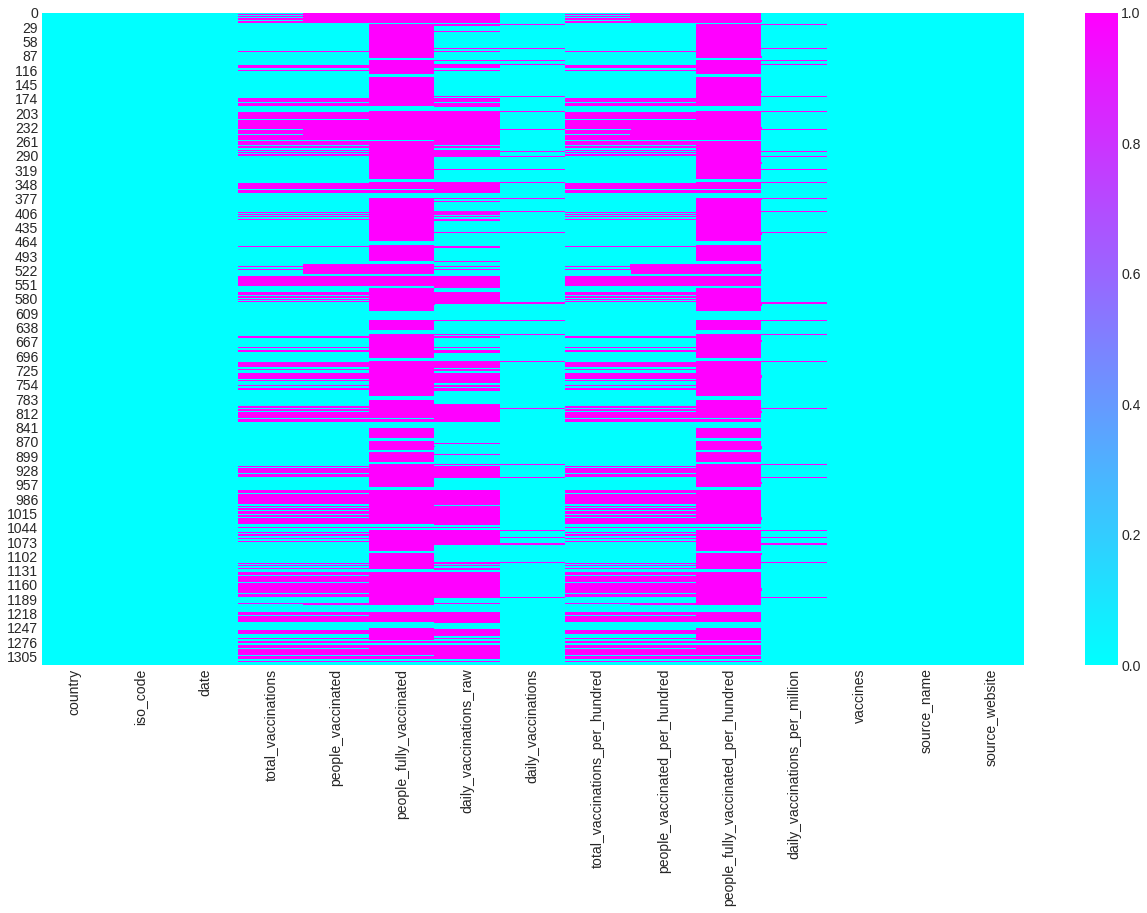

In [5]:
sns.heatmap(cv.isna(),cmap='cool')

**REPLACE INTO NaN VALUE**

In [6]:
n_cv = cv.replace({'?':np.NaN})

**DROP COUNTRY DATA IN AXIS=1**

In [7]:
cv.drop('country', axis=1, inplace=True)

**FILL NULL VALUES AS MEDIAN VALUES**

In [8]:
n_cv.fillna(n_cv.median(), inplace=True)

**CHECK DUPLICATE VALUE ARE IN DATASETS**

In [9]:
n_cv.duplicated().sum()

0

**DROP DUPLICATE VALUES**

In [10]:
n_cv.drop_duplicates(inplace=True)

In [11]:
n_cv.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [12]:
n_cv = n_cv.rename(columns={"num       ":"num"})

**AFTER WE CHECK WHETHER THERE IS NULL OR NOT**

In [13]:
n_cv.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

**PLOT IN HEATMAP**

<AxesSubplot:>

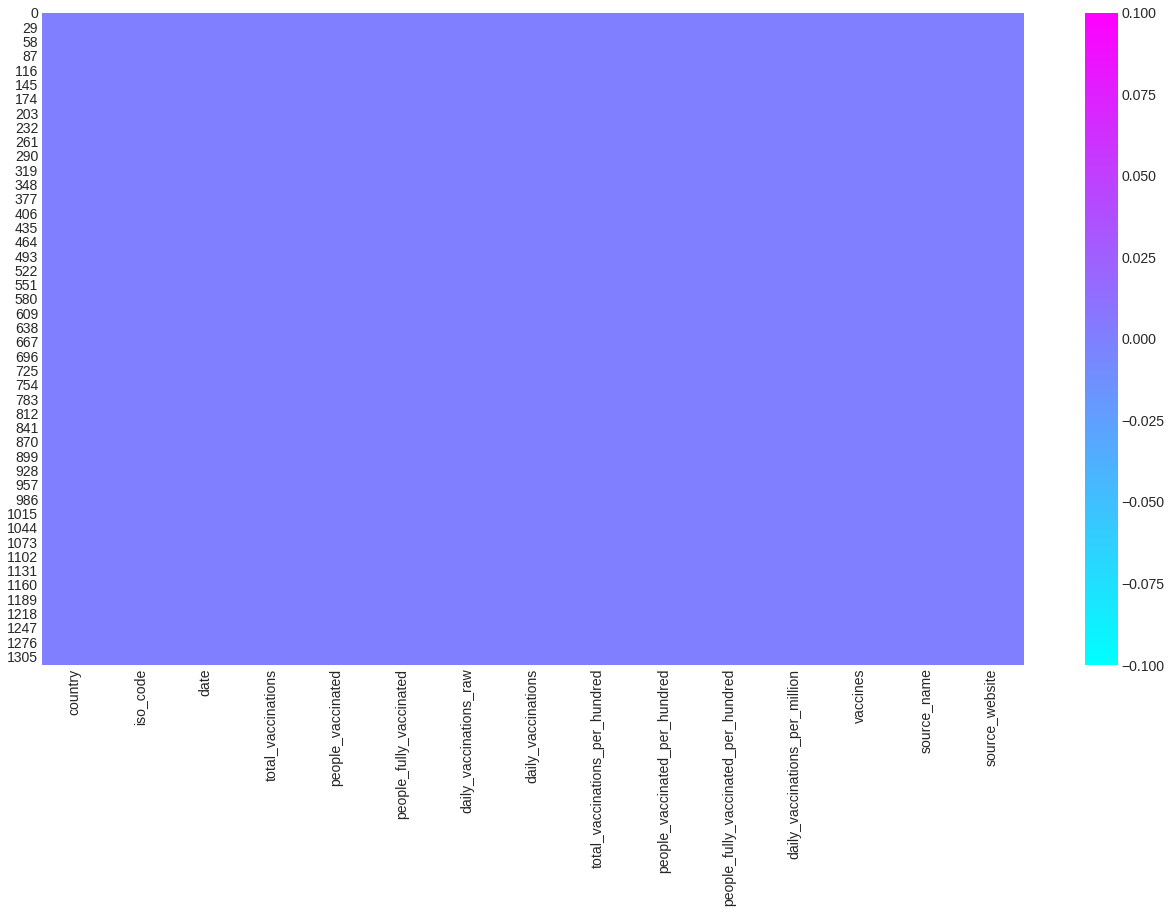

In [14]:
sns.heatmap(n_cv.isna(),cmap='cool')

In [15]:
n_cv

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,12/29/2020,700.0,58598.5,8362.0,7550.0,5541.0,0.00,0.77,0.06,628.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,12/30/2020,60753.0,58598.5,8362.0,7550.0,15656.0,0.75,0.77,0.06,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,12/31/2020,32013.0,58598.5,8362.0,7550.0,15656.0,0.07,0.77,0.06,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,01/01/2021,60753.0,58598.5,8362.0,7550.0,11070.0,0.75,0.77,0.06,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,01/02/2021,60753.0,58598.5,8362.0,7550.0,8776.0,0.75,0.77,0.06,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Wales,WAL,01/17/2021,151938.0,151737.0,201.0,7550.0,9403.0,4.82,4.81,0.01,2982.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1319,Wales,WAL,01/18/2021,162197.0,161932.0,265.0,10259.0,10123.0,5.14,5.14,0.01,3211.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1320,Wales,WAL,01/19/2021,176186.0,175816.0,370.0,13989.0,10672.0,5.59,5.58,0.01,3385.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1321,Wales,WAL,01/20/2021,190831.0,190435.0,396.0,14645.0,11105.0,6.05,6.04,0.01,3522.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


**PLOT TOTAL VACCINATIONS**

<AxesSubplot:title={'center':'Total_Vaccinations'}, xlabel='total_vaccinations', ylabel='date'>

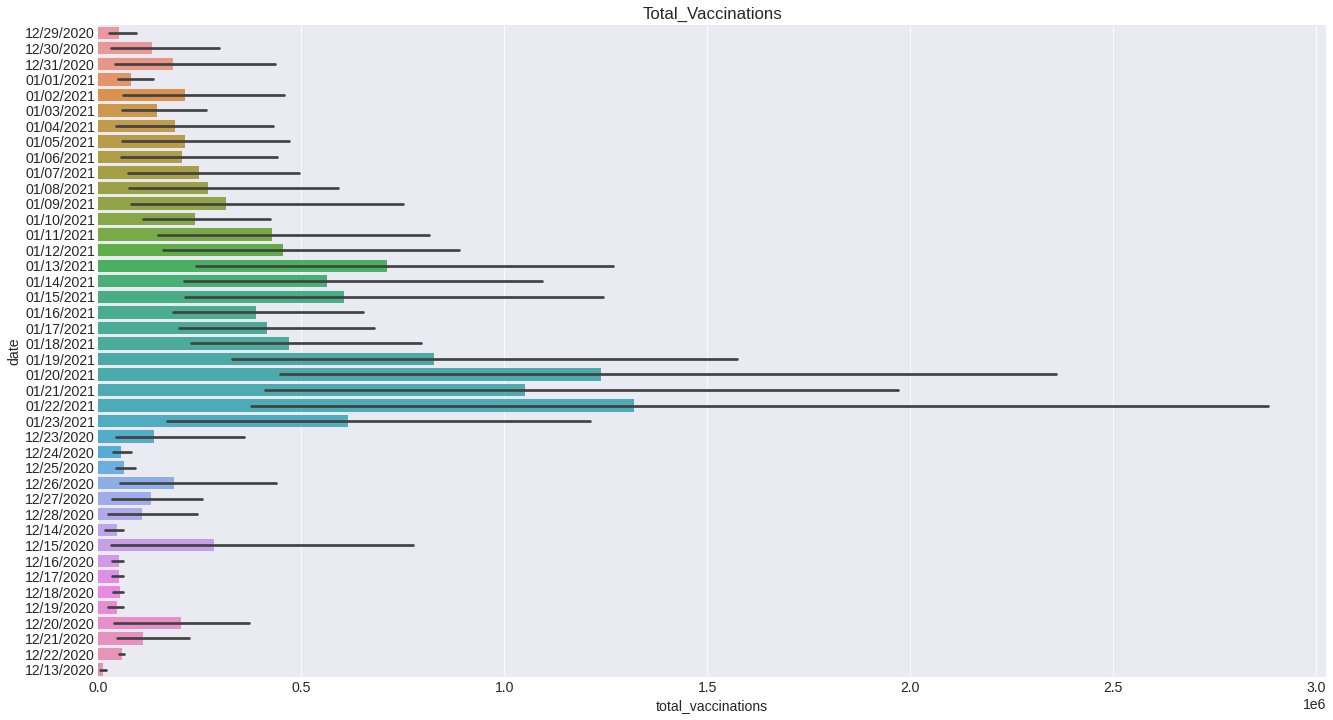

In [16]:
plt.title('Total_Vaccinations')
sns.barplot(n_cv['total_vaccinations'],n_cv['date'])

**PLOT TOTAL VACCINATION PER HUNDRED**

<AxesSubplot:title={'center':'Total_Vaccinations_Per_Hundred'}, xlabel='total_vaccinations_per_hundred', ylabel='date'>

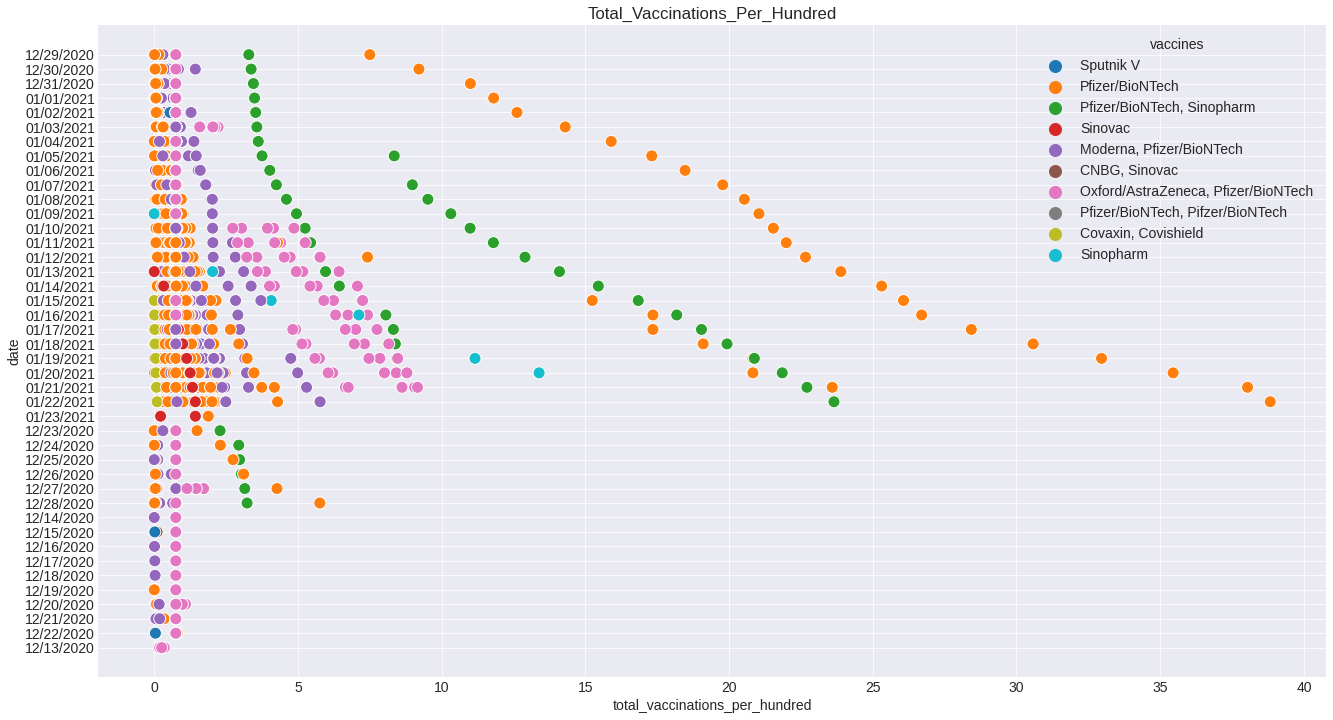

In [17]:
plt.title('Total_Vaccinations_Per_Hundred')
sns.scatterplot(n_cv['total_vaccinations_per_hundred'],n_cv['date'],n_cv['vaccines'])

**PLOT PEOPLE VACCINATED**

<AxesSubplot:title={'center':'People_Vaccinated'}, xlabel='people_vaccinated', ylabel='vaccines'>

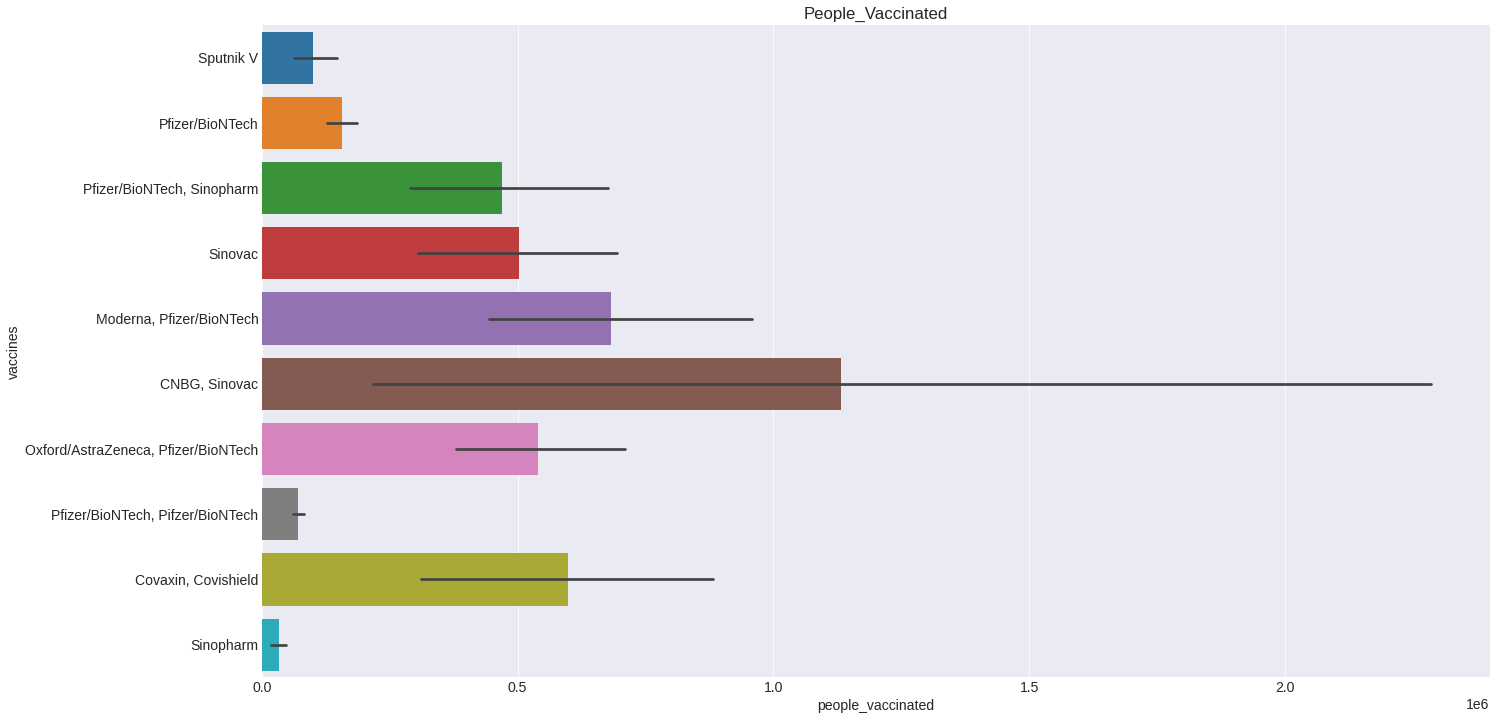

In [18]:
plt.title('People_Vaccinated')
sns.barplot(n_cv['people_vaccinated'],n_cv['vaccines'])

**PLOT DAILY VACCINATION IN EACH COUNTRY WITH VACCINES TYPES**

In [19]:
df = n_cv
fig = px.bar(df, x=df.country, y=df.daily_vaccinations, color=df.vaccines)
fig.show()

**PLOT PEOPLE FULLY VACCINATED IN EACH COUNTRY WITH VACCINES TYPES**

In [20]:
df = n_cv
fig = px.bar(df, x=df.country, y=df.people_fully_vaccinated, color=df.vaccines)
fig.show()

**PLOT DAILY VACCINATIONS RAW IN EACH DAYS OF EVERY COUNTRY WITH VACCINES TYPES**

In [21]:
df = n_cv
fig = px.scatter(df, df.date,df.country, size=df.daily_vaccinations_raw, color=df.vaccines)
fig.show()

**PLOT ALL OVER VACCINATION PROCESS**

<AxesSubplot:title={'center':'Vaccination_Process'}>

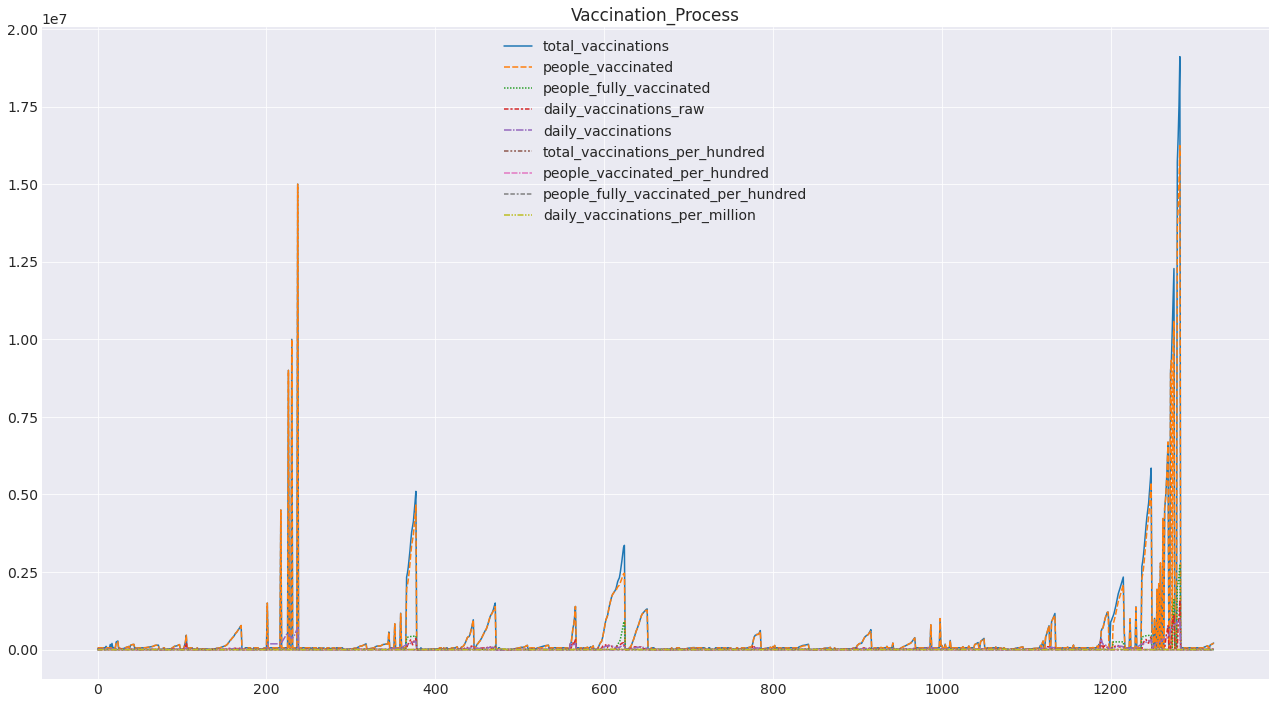

In [22]:
plt.title('Vaccination_Process')
sns.set_style('dark')
sns.lineplot(data=n_cv)

**PLOT PEOPLES FULLY VACCINATED PER HUNDRED IN EACH DAYS OF EVERY COUNTRY WITH VACCINES TYPES**

In [23]:
df = n_cv
fig = px.bar(df, x=df.country, y=df.people_fully_vaccinated_per_hundred, color=df.vaccines)
fig.show()

**PLOT DAILY VACCINATIONS PER MILLION IN EACH DAYS OF EVERY COUNTRY WITH VACCINES TYPES**

In [24]:
df = n_cv
fig = px.bar(df, x=df.country, y=df.daily_vaccinations_per_million, color=df.vaccines)
fig.show()

**NEXT WE PLOT IN GEOMAP**

In [25]:
df = pd.read_csv('../input/covid-19vaccinationprocess/country_vaccinations.csv')
## Drop rows corresponding to the World
df = df[df.country != 'World']
## Sort df by date
df = df.sort_values(by=['date'])

**TOTAL VACCINATION IN COUNTRY**

In [26]:
fig = px.choropleth(df, locations="iso_code",
                    color="total_vaccinations",
                    hover_name="country",
                    animation_frame="date",
                    title = "Total Vaccination",
                    color_continuous_scale='rainbow')
fig["layout"].pop("updatemenus")
fig.show()

In [27]:
n_cv.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

**PEOPLE VACCINATED IN COUNTRY**

In [28]:
fig = px.choropleth(df, locations="iso_code",
                    color="people_vaccinated",
                    hover_name="country",
                    animation_frame="date",
                    title = "People Vaccinated",
                    color_continuous_scale='viridis')
fig["layout"].pop("updatemenus")
fig.show()

**PEOPLE FULLY VACCINATED IN COUNTRY**

In [29]:
fig = px.choropleth(df, locations="iso_code",
                    color="people_fully_vaccinated",
                    hover_name="country",
                    animation_frame="date",
                    title = "People Fully Vaccinated",
                    color_continuous_scale="plasma")
fig["layout"].pop("updatemenus")
fig.show()

**DAILY VACCINATIN RAW IN COUNTRY**

In [30]:
fig = px.choropleth(df, locations="iso_code",
                    color="daily_vaccinations_raw",
                    hover_name="country",
                    animation_frame="date",
                    title = "Daily Vaccination Raw",
                    color_continuous_scale='jet')
fig["layout"].pop("updatemenus")
fig.show()

**DAILY VACCINATION IN COUNTRY**

In [31]:
fig = px.choropleth(df, locations="iso_code",
                    color="daily_vaccinations",
                    hover_name="country",
                    animation_frame="date",
                    title = "Daily Vaccination",
                    color_continuous_scale='magma')
fig["layout"].pop("updatemenus")
fig.show()

**PEOPLE VACCINATED PER HUNDRED IN COUNTRY**

In [32]:
fig = px.choropleth(df, locations="iso_code",
                    color="people_vaccinated_per_hundred",
                    hover_name="country",
                    animation_frame="date",
                    title = "People Vaccinated Per Hundred",
                    color_continuous_scale='YlOrRd')
fig["layout"].pop("updatemenus")
fig.show()

**PEOPLE FULLY VACCINATED PER HUNDRED IN COUNTRY**

In [33]:
fig = px.choropleth(df, locations="iso_code",
                    color="people_fully_vaccinated_per_hundred",
                    hover_name="country",
                    animation_frame="date",
                    title = "People Fully Vaccinated Per Hundred",
                    color_continuous_scale='jet')
fig["layout"].pop("updatemenus")
fig.show()

**PEOPLE FULLY VACCINATED PER MILLION IN COUNTRY**

In [34]:
fig = px.choropleth(df, locations="iso_code",
                    color="daily_vaccinations_per_million",
                    hover_name="country",
                    animation_frame="date",
                    title = "Daily Vaccination Per Million",
                    color_continuous_scale='jet')
fig["layout"].pop("updatemenus")
fig.show()